# Demo dairport
In this example, a satellite image of an airport is processed. The aim is to detect the runways which are characterized by thin, long and straight features. An open top-hat is first used to enhance the runways. A rough thresholding followed by a thinning operator gives most of the thin structures of the image. They can filtered by selecting only closed features with sufficient length. This result is used as a marker to reconstruct the original gray-scale image, giving as output a gray-scale enhanced airport runways, which can be finally thresholded. 

In [1]:
import numpy as np
from PIL import Image
import ia870 as ia

## Reading
The satellite image of the airport is read. 

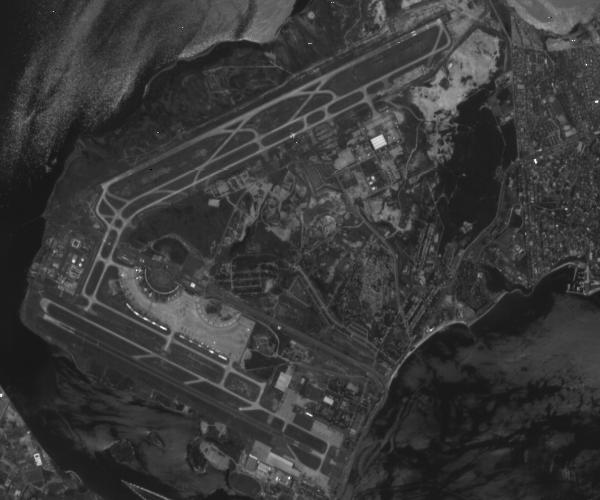

In [5]:
f_pil = Image.open('data/galeao.jpg').convert('L') # must be read as grayscale
f_pil

## First, enhance the runways by an open top-hat.

The disk of radius 5 (diameter 11) is chosen to detect features smaller than this size. For visualization, the top-hat image is brightened by 150 gray-levels. 

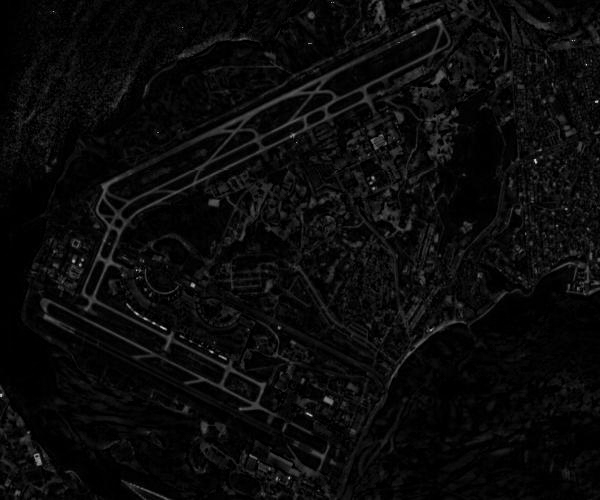

In [6]:
f = np.array(f_pil)
th=ia.iaopenth(f,ia.iasedisk(5))
Image.fromarray(th)

## Followed by a thresholding.

A thresholding is applied to detect the features enhanced by the top-hat. This is a standard top-hat sequence. 

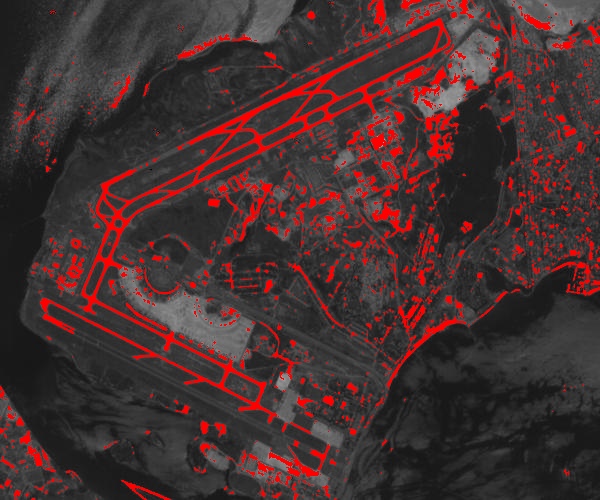

In [7]:
bin=ia.iathreshad(th,30)
Image.fromarray(ia.iagshow(f, bin).transpose(1, 2, 0))

## Thinning, pruning and area open.

The thinning (red) and pruning (green) detect closed structures which characterized the runways structure. The area open (blue) selects only very long features, with more than 1000 pixels. 

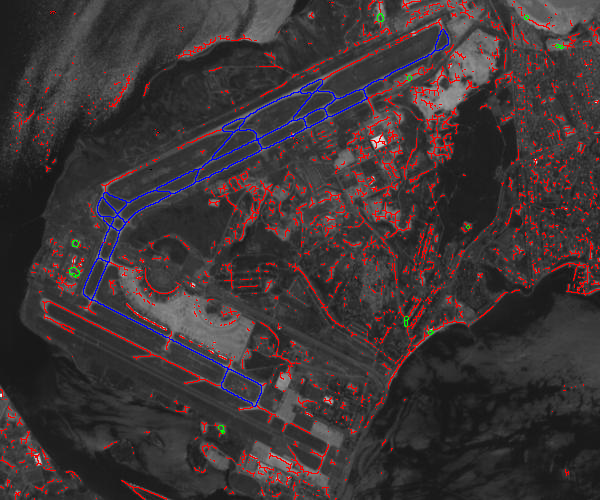

In [8]:
m1=ia.iathin(bin)
m2=ia.iathin(m1,ia.iaendpoints())
m=ia.iaareaopen(m2,1000,ia.iasebox())
Image.fromarray(ia.iagshow(f, m1, m2, m).transpose(1, 2, 0))

## Reconstruction.

The previous result is a sample of the runway pixels. It is used as a marker for gray-scale morphological reconstruction. The runways are enhanced in the reconstructed image. 

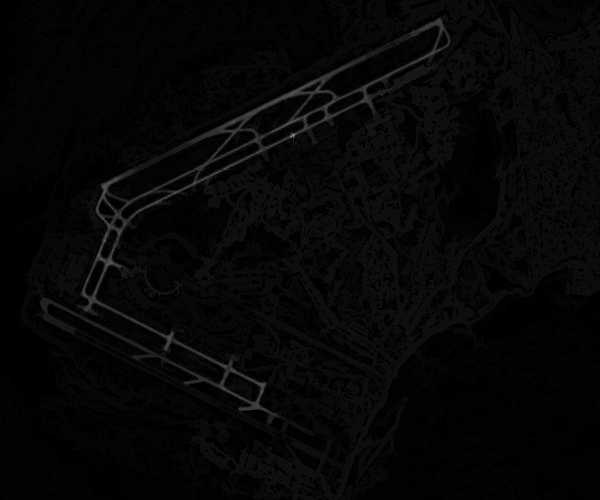

In [9]:
g=ia.iainfrec(ia.iagray(m), th)
Image.fromarray(g)

## Final thresholding.
A thresholding is applied to the reconstructed image, detecting the airport runways. 

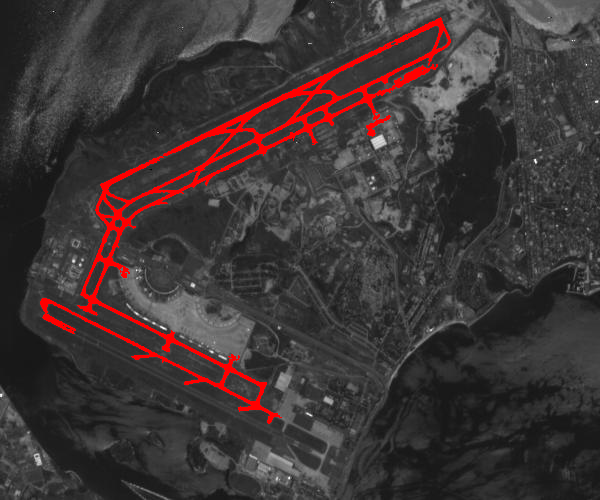

In [10]:
final=ia.iathreshad(g, 20)
Image.fromarray(ia.iagshow(f,final).transpose(1,2,0))